# Support Vector Machines

A _Support Vector Machine_ (SVM) is a powerful and versatile Machine Learning Model, <b>capable of performing linear or nonlinear classification regression and even outlier classification</b>.

SVMs are particularly well suited for classification of complex but small/medium size datasets.

# Linear SVM Classification

When classes can clearly be separated with a straight line, they are _linearly separable_.

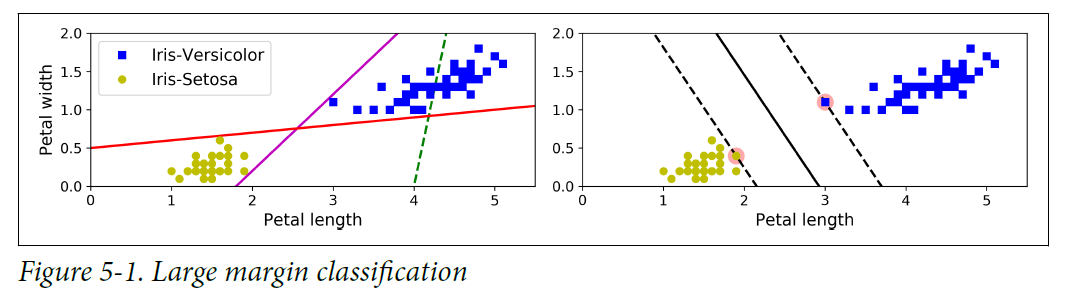

We can think of SVM as "fitting the widest possible street (parallel lines on the right plot) between the classes &rarr; large margin classification. The circled instances on the right image are called _support vectors_, they are the ones who will determine the edge of the street.

<b>SVMs are sensitive to the feature scales.</b> 

## Soft Margin Classification

If we strictly impose that all instances have to be off the street and on the right side, this is called _hard margin classification_ &rarr; sensitive to outliers (will not generalize well), does not work if the data is no linearly separable.

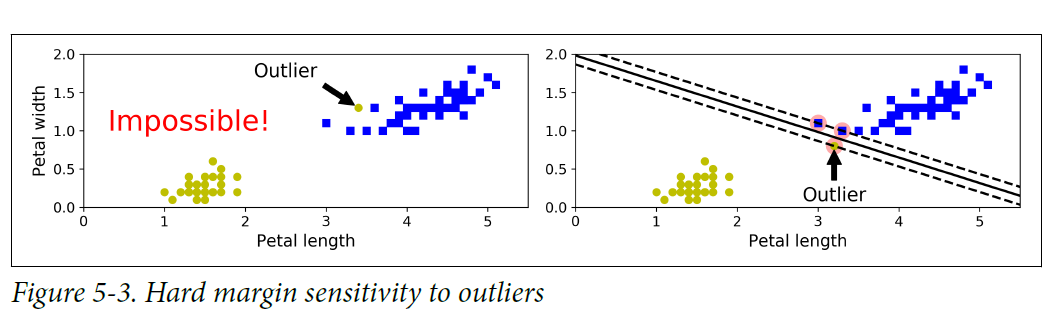

To avoid this we use a more flexible model, finding a good balance between keeping the street as large as possible while limiting _margin violations_ (instances that end up in the middle of the street or on the wrong side) &rarr; _soft margin classification_

####  How to find the best soft margin? &rarr; cross validation

In Scikit-Learn's SVM classes, we can control this balance using the C hyperparameter: a smaller C values leads to a wider street but more margin violations.

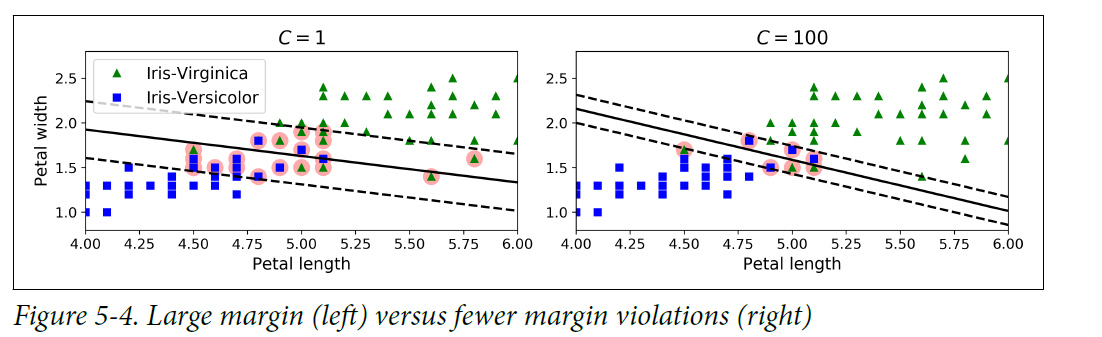

If SVM is overfitting, regularize it by reducing C

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge")),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [2]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

Unlike Logistic Regression classifiers, SVM classifiers do not output probabilities for each class.

For out-of-core training (i.e., huge datasets that don't fit into memory) &rarr; use SGDClassifier class, with SGDClassifier(loss="hinge", alpha=1/(m*C))

This applies Stochastic Gradient Descent to train a linear SVM classifier


# Nonlinear SVM Classification

Many datasets are not close to being linearly separable. One solution is again to add polynomial features

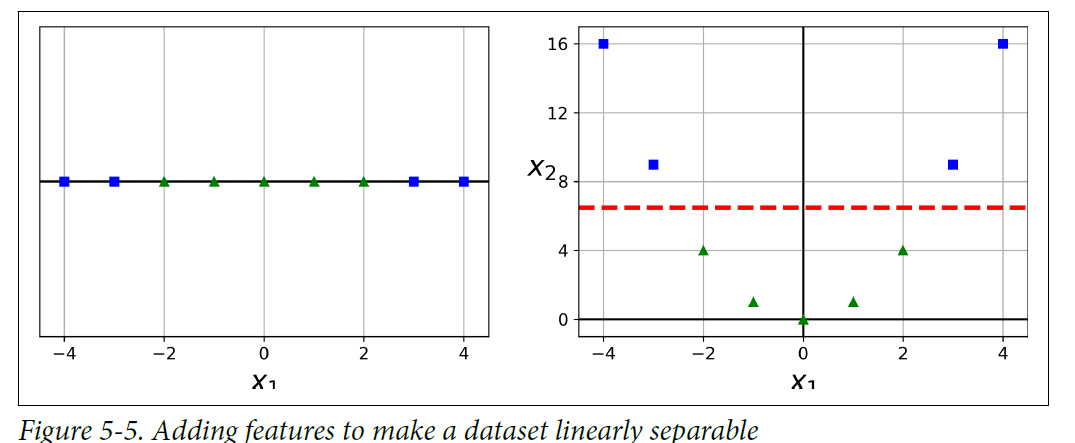







# SVM Main Ideas

1) Start with data ina relatively low dimension

2) Move the data into a higher dimension

3) Find a Support Vector Classifier that separates the data into two groups

### How to decide how to transform the data?


In order to make the mathematics possible, SVM use <b>Kernel Functions</b> to systematically find Support Vector Classifiers in higher dimensions.

# Kernel Functions

##  Polynomial Kernel

Adding polynomial features is simple, but a low polynomial degree cannot deal with  very complex datasets, and a high polynomial degree creates a huge number of features, making the model too slow.

The polynomial kernel, with parameter _d_ (degree of the polynomial) will find the degree with best support vector classifier results &rarr; cross validation

In [3]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

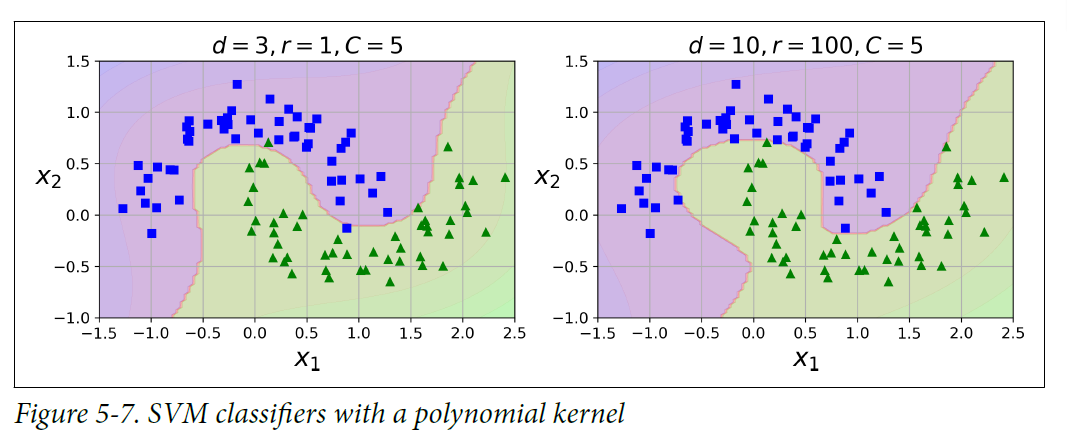

### Polynomial Kernel's parameters

$$Polynomial Kernel = (a \times b+r)^d$$

Where:
* a and b are two different observations in the dataset

* r determines the polynomial's coefficient

* d d sets the degree of the polynomial

The function is a dot product that yields the high-dimensional coordinates for the data.

## Radial  (Radial Basis Function RBF) Kernel

It behaves like a Weighted Neares Neighbodr model 

The closests observations have a lot of influence on how we classify new observations

### RBFs parameters

$$Radial Kernel = e^{-\gamma(a-b)^2}$$

Where

 * a and b refer to two different observations
 * this difference then is squared, so larger distances reduce the influence (as e is powered to a negative number)
 * gamma, deterimined by cross validation, scales the squared distance (and thus, the influence)

#### A little bit of intuition

Lets get back to the Poolynomial Kernel &rarr; What would happen if we keep adding polynomial kernes with $r=0$ and increasing $d$ until $d \rightarrow \infty$:


$$r = 0  \rightarrow (a \times b+r)^d = (a \times b)^d$$

$$a^1b^1+a^2b^2+a^3b^3+...a^\infty b^\infty = (a,a^2,a^3,...,a^\infty).(b^1,b^2,b^3,...,b^\infty)$$

This would give us a Dot Product with coordinates for an infinite number of dimensions

Now, going back to the RBF function:

$$e^{-\gamma(a-b)^2}=e^{-\gamma(a^2+b^2-2ab)} = e^{-\gamma(a^2+b^2)}e^{\gamma2ab}$$

Setting $\gamma = \frac{1}{2}$, we will to a Taylor Series Expansion on its last term
$$e^{-\frac{1}{2}(a^2+b^2)}e^{ab}$$


<div>
    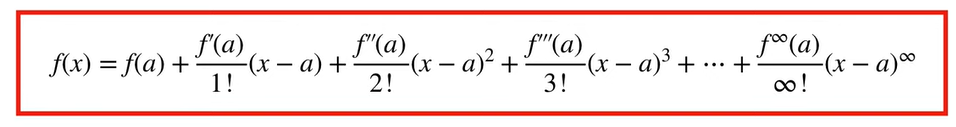
</div>

Thus

<div>
    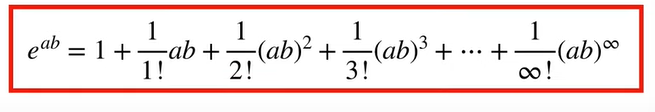
</div>

This result copntains the dot product with coordinates for an infinite number of dimensions previously calculated for the polynomial kernel with $r=0$

converting it to a dot product:

<div>
    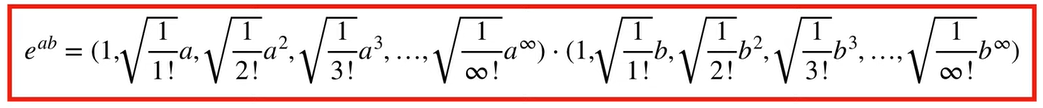
</div>

finally, multiplying both parts by $s=\sqrt{e^{-\gamma(a^2+b^2)}}$:


<div>
    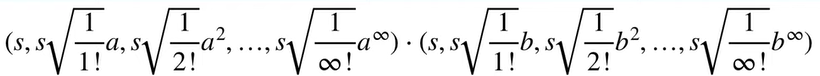
</div>

We can see that the RBF is equal to a dot product that has coordinates for an ifinite number of dimensions.

So every time we plug numbers into the kernel, we are getting the relationship between two points in infinte-dimensions.

### The Kernel Trick

In SVM, we can apply the _kernel trick_, which calculates high-dimensional relationships without actually transforming the data.

Which kernel to use? As a rule of thumb, always try the linear kernel first, specially if the training set is large or if it has plenty of features. If the training set is not too large, try the Guassian RBF kernel, use others if time is available with cross validation and grid search

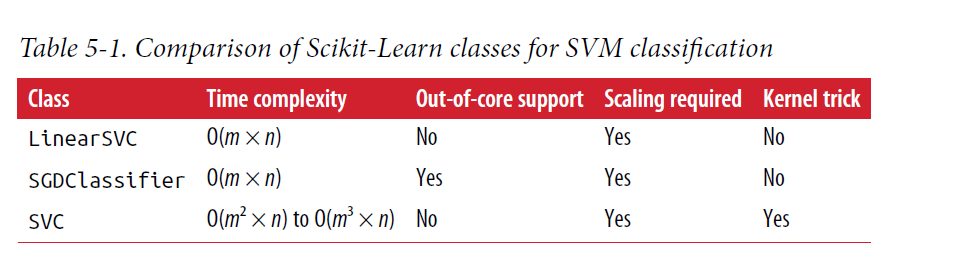

# SVM Regression

SVM also supports linear an nonlinear regression &rarr; instead of trying to fit the largest possible street between two classes while limiting margins of violations, SVM Regression tries to fit as many instances as possible _on_ the street while limiting marign violations (instances _off_ the street). Tbhe width of the street is controlled by hyperparameter $\epsilon$

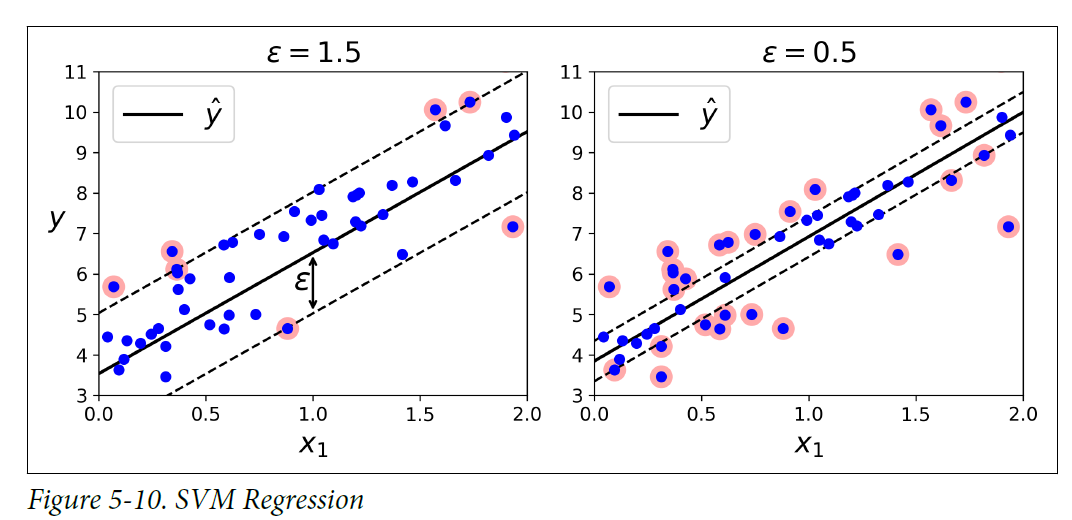

Adding more training instances within the margin does not affect the model's predictions. The model is said to be _$\epsilon$-insensitive_

In [ ]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

To solve nonlinear regression tasks, we can use a kernelized SVM model.

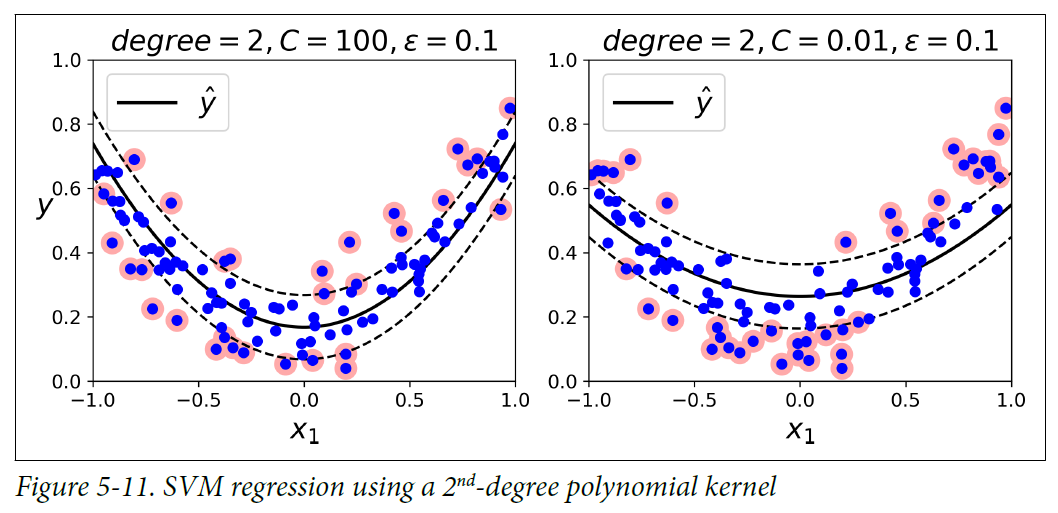

